# **Redes Neurais e CNN: Identificação de Objetos**

Neste trabalho iremos fazer a identificação de um conjunto de dados de imagens de artigos de Zalando chamado Fashion-MNIST, que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes.

Fonte: https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br

# **ATIVIDADE:**

**Descrição:**

Nesta atividade, você receberá um código de uma Rede Neural Artificial e uma Rede Neural Convolucional (CNN) implementada. Sua tarefa é analisar o código fornecido e fazer uma interpretação detalhada de cada linha, identificando e explicando as principais etapas, camadas e operações realizadas pela RNA e pela CNN.

**Instruções:**

1. Preencha o código com comentários em cada linha, explicando sua função e propósito.
2. Analise o código cuidadosamente para entender como a CNN é configurada.
3. Identifique e explique as camadas de convolução, camadas de pooling, camadas densas, funções de ativação, tamanhos dos filtros, número de neurônios, etc.
4. Identifique quais técnicas de regularização ou otimização formam utilizadas no código e explique como elas contribuem para o desempenho e a generalização do modelo.
5. Comente sobre a função de ativação utilizada na camada de saída.
6. Descreva os hiperparâmetros e ajustes do modelo, como a taxa de aprendizado, número de épocas de treinamento e o tratamento dos conjuntos de dados de treinamento e teste.
7. Faça uma avaliação descritiva dos resultados das Redes Neurais implementadas.



**Entregável:**

Prepare uma análise detalhada do código fornecido, destacando as principais características da CNN e como ela é configurada para a tarefa em questão. Se necessário, inclua observações sobre o potencial de melhoria ou otimização do modelo.

Esta atividade visa consolidar seu conhecimento sobre CNNs, ajudando a compreender como uma Rede Neural Convolucional é implementada e configurada para tarefas específicas.

In [1]:
# import do tensorflow
import tensorflow as tf
# import do keras da biblioteca do tensorflow
from tensorflow import keras

In [2]:
# import do numpy
import numpy as np
# import do pandas
import pandas as pd
# import do pyplot da biblioteca do matplotlib
from matplotlib import pyplot as plt
# comando para mostrar as imagens no output das células sem abrir janelas
%matplotlib inline

## Importando base de dados

In [3]:
# carregando o dataset fashion_mnist que vem com a biblioteca
fashion_mnist = keras.datasets.fashion_mnist


In [4]:
# baixando os dados do dataset e guardando em variáveis de treino e teste
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# imprimindo as dimensões (qtd imagens, altura, largura) do X do treino
print(X_train_full.shape)
# imprimindo as dimensões (qtd imagens,) do y do treino
print(y_train_full.shape)
# imprimindo as dimensões (qtd imagens, altura, largura) do X do teste
print(X_test.shape)
# imprimindo as dimensões (qtd imagens,) do y do teste
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# Transformar a escala para que os valores fiquem entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
# separando os 5 0000 primeiros valores de X e y para validação
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
# defininido o nome das classes
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta",
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [8]:
# output da classe bota para exemplo
nomes_classes[y_train[5]]

'bota'

In [9]:
# output do sexto elemento da variável de treino
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

bota


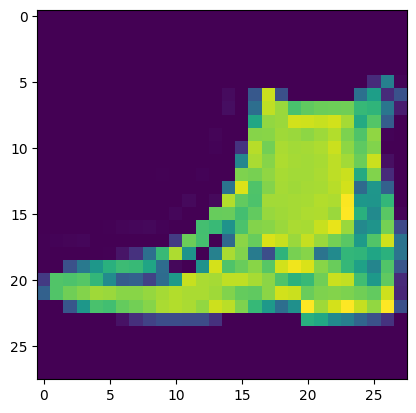

In [10]:
# determinando a variável representando índice do exemplo para demonstração
exemplo_n = 5
# imprimindo o nome da classe
print(nomes_classes[y_train[exemplo_n]])
# demonstração da imagem configurada para manter o formato dos píxeis
plt.imshow(X_train[exemplo_n], interpolation='nearest')
# comando para exibir a imagem carregada
plt.show()

#  Rede Neural Artificial com Keras

In [11]:
# definindo o modelo como sequencial
nn = keras.models.Sequential()
# transformando as imagens multidimensionais em um vetor de uma dimensão
nn.add(keras.layers.Flatten(input_shape=[28, 28]))
# criando nova camada da rede com 300 neurônios ligados a cada elemento da camada plana anterior
# ativação do tipo ReLU (transforma valores negativos em 0 para garantir não linearidade)
nn.add(keras.layers.Dense(300, activation="relu"))
# adicionando dropout para desligar 10% dos neurônios para evitar overfitting
nn.add(keras.layers.Dropout(rate=0.1))
# outra camada densa com 100 neurônios e ativação ReLU
nn.add(keras.layers.Dense(100, activation="relu"))
# adicionando dropout para desligar 10% dos neurônios para evitar overfitting
nn.add(keras.layers.Dropout(rate=0.1))
# última camada densa com 10 neurônios, cada um representando uma classe
# a ativação é softmax que normaliza os valores dados para cada classe e retorna a que obteve o maior valor
nn.add(keras.layers.Dense(10, activation="softmax"))
# exibindo um resumo da arquitetura da rede
nn.summary()

C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando e treinando o modelo

In [26]:
# comando para medir o tempo da linha (para medir bloco inteiro deveria ser %%time)
%time
# compilação com função de perda esparsa (cada classe um inteiro),
# que avalia o quão certa está a rede em suas respostas
nn.compile(loss="sparse_categorical_crossentropy",
           # otimizador padrão de Descida do Gradiente Estocástica,
           # algoritmo que tenta maximizar a métrica selecionado e ajustar os pesos
              optimizer="sgd",
           # métrica a ser visualizada
              metrics=["accuracy"])
# treinamento do modelo com 5 épocas e usando os dados de validação definidos anteriormente
history_nn = nn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8765 - loss: 0.3450 - val_accuracy: 0.8796 - val_loss: 0.3389
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8786 - loss: 0.3383 - val_accuracy: 0.8818 - val_loss: 0.3289
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8818 - loss: 0.3293 - val_accuracy: 0.8826 - val_loss: 0.3287
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8829 - loss: 0.3246 - val_accuracy: 0.8826 - val_loss: 0.3252
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8846 - loss: 0.3196 - val_accuracy: 0.8872 - val_loss: 0.3221
CPU times: total: 24.8 s
Wall time: 13.6 s


### Visualizar a performance

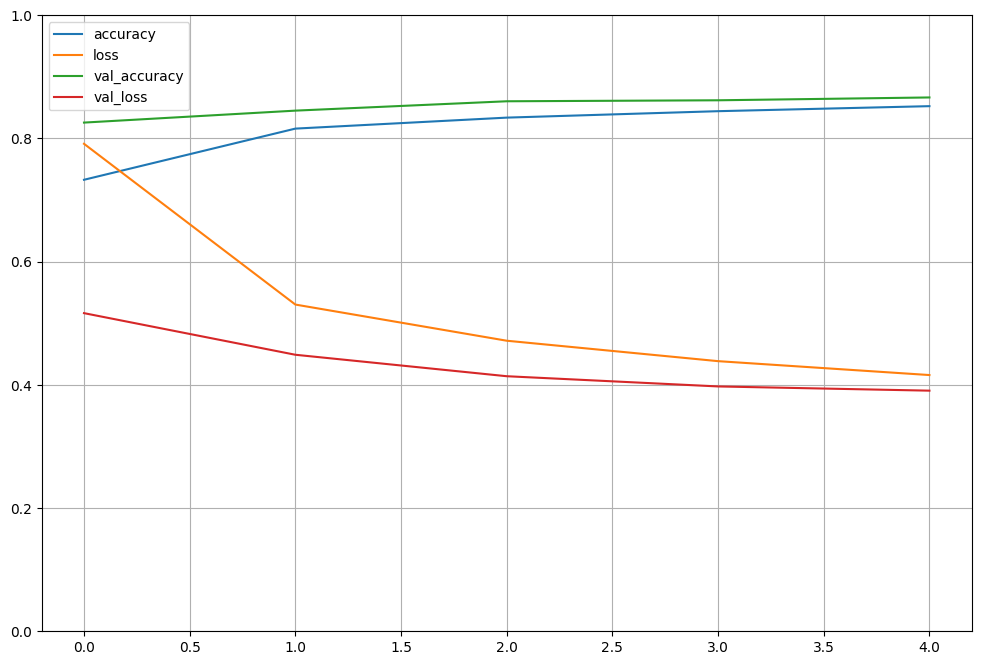

In [13]:
#Cria um DataFrame do Pandas com o histórico de treinamento (perda e acurácia de treino/validação)
# e plota um gráfico de linhas. 'figsize' define o tamanho da figura
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
# Adiciona uma grade ao gráfico para facilitar a leitura dos valores
plt.grid(True)
# Define os limites do eixo Y (vertical) entre 0 e 1, já que a acurácia e a perda (neste caso) estão nessa faixa
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
# Exibe o gráfico gerado
plt.show()

### Avaliar o modelo

In [14]:
# Avalia o modelo usando o conjunto de teste (X_test, y_test)
# Retorna a perda (loss) e a acurácia (accuracy) nesses dados
nn.evaluate(X_test, y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 77.0483  


[77.04828643798828, 0.8015999794006348]

###Realizar uma Previsão

In [15]:
# Seleciona as 4 primeiras imagens do conjunto de teste para fazer uma previsão rápida
X_novo = X_test[:4]
# O modelo prevê as probabilidades para cada uma das 10 classes
# Retorna uma matriz onde cada linha é uma imagem e cada coluna é a probabilidade de ser uma classe
y_proba = nn.predict(X_novo)
# Exibe as probabilidades calculadas
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
# Pega o índice da maior probabilidade em cada linha (axis=-1) para determinar a classe predita
y_pred = np.argmax(nn.predict(X_novo), axis=-1)
# Imprime os índices das classes preditas (ex: [9, 2, 1, 1])
print(y_pred)
# Usa os índices para buscar o nome textual das classes na lista 'nomes_classes' e imprime
print(np.array(nomes_classes)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


### Verificar os resultados

In [17]:
# Pega os rótulos reais das 4 primeiras imagens de teste
y_novo = y_test[:4]
# Imprime os rótulos reais para comparação visual com o que foi predito acima
print(y_novo)
# Imprime novamente os nomes das classes preditas, apenas para confirmar
np.array(nomes_classes)[y_pred]

[9 2 1 1]


array(['bota', 'casaco', 'calca', 'calca'], dtype='<U10')

calca


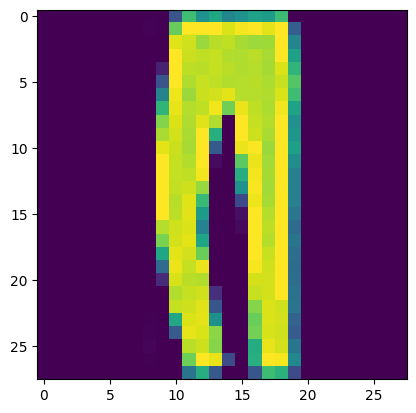

In [18]:
# Imprime o nome da classe predita para a terceira imagem (índice 2)
print(nomes_classes[y_pred[2]])
# Exibe a imagem correspondente (X_novo[2]) usando o matplotlib
# 'interpolation="nearest"' evita suavização, mostrando os pixels originais
plt.imshow(X_novo[2], interpolation='nearest')
# Mostra o plot
plt.show()

**Avaliação descritiva dos resultados:**

1. Gráfico de Performance: O gráfico gerado mostra que a acurácia de validação (val_accuracy) e a de treino (accuracy) subiram consistentemente, enquanto a perda (loss) caiu. Isso indica que o modelo aprendeu bem durante as 5 épocas e não apresentou sinais claros de overfitting, pois ambas as curvas caminharam juntas.

2. Anomalia na Avaliação: Ao executar nn.evaluate(X_test, y_test), o resultado foi:

Loss: ~77.05 (Muito alta)
Acurácia: ~80.16%

O conjunto de teste (X_test) não foi normalizado. No início do código, apenas o treino e validação foram divididos por 255.0 (X_train / 255.0). O modelo aprendeu a trabalhar com valores entre 0 e 1, mas recebeu no teste valores entre 0 e 255.

Isso explica por que a perda foi tão alta (77.05) comparada à validação (0.32).

Apesar disso, a rede neural foi robusta o suficiente para acertar 80% das imagens, mas o desempenho seria consideravelmente melhor se o X_test tivesse sido normalizado.

3. Previsões: O modelo fez previsões nas 4 primeiras imagens.

Predições: ['bota' 'casaco' 'calca' 'calca'] (Índices: 9, 2, 1, 1)

Realidade: [9 2 1 1] O modelo acertou todas as 4 amostras iniciais, demonstrando que, para classes visualmente distintas (como bota e calça), a RNA simples consegue generalizar bem, mesmo com a discrepância na escala dos dados de entrada.

# Treinando CNN com Keras

In [19]:
# Inicializa o modelo sequencial (uma camada após a outra)
cnn = keras.models.Sequential([
# Camada de entrada definindo o formato da imagem (28x28 pixels, 1 canal de cor/cinza)
keras.layers.InputLayer(input_shape = (28,28,1)),
# 1ª Camada de Convolução: 64 filtros de tamanho 5x5
# 'relu' adiciona não-linearidade. 'padding=same' mantém o tamanho da imagem inserindo zeros nas bordas
# 'kernel_initializer' define como os pesos iniciais são gerados
keras.layers.Conv2D(64,5, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
# 1ª Camada de Pooling (Max Pooling): Reduz a dimensionalidade pegando o maior valor em janelas 2x2
 # Ajuda a reduzir o processamento e torna o modelo mais robusto
keras.layers.MaxPool2D+(2),
# 2ª Camada de Convolução: Aumenta para 128 filtros, agora menores (3x3), para capturar detalhes mais finos
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
# 3ª Camada de Convolução: Mais 128 filtros 3x3. Empilhar convoluções ajuda a aprender padrões complexos
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
# 2ª Camada de Pooling: Reduz novamente a dimensão espacial pela metade
keras.layers.MaxPool2D(2),
# 4ª Camada de Convolução: Aumenta a profundidade para 258 filtros
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
# 5ª Camada de Convolução: Repete a operação anterior para extração profunda de características
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
# 3ª Camada de Pooling: Última redução espacial antes de ir para as camadas densas
keras.layers.MaxPool2D(2),
# Camada Flatten: "Achata" o mapa de características 3D (altura, largura, canais) em um vetor 1D
# Necessário para conectar as camadas convolucionais às camadas densas
keras.layers.Flatten(),
# 1ª Camada Densa: 128 neurônios para processar as características extraídas
keras.layers.Dense(128, activation="relu"),
# Dropout: Desliga aleatoriamente 50% dos neurônios durante o treino para evitar overfitting
keras.layers.Dropout(rate=0.5),
# 2ª Camada Densa: 64 neurônios, afunilando a informação
keras.layers.Dense(64, activation="relu"),
# Dropout: Mais uma camada de regularização (50%) para garantir generalização
keras.layers.Dropout(rate=0.5),
# Camada de Saída: 10 neurônios (um para cada classe de roupa)
# 'softmax' transforma os valores em probabilidades que somam 1 (ex: 80% bota, 10% tênis...).
keras.layers.Dense(10, activation="softmax")])


C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
# Exibe o resumo da arquitetura, mostrando o formato dos dados em cada etapa e o número de parâmetros.
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 258)      │       297,474 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 258)      │       599,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 258)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2322)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       297,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,162 (5.44 MB)

 Trainable params: 1,426,162 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Imprime o formato original dos dados de treino (ex: 55000 imagens, 28x28)
print(X_train.shape)
# Redimensiona os dados para incluir o canal de cor (necessário para Conv2D)
# Transforma de (N, 28, 28) para (N, 28, 28, 1), onde 1 é o canal (escala de cinza)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_valid_new = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2],1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
# Imprime o novo formato para confirmação
print(X_train_new.shape)

(55000, 28, 28)
(55000, 28, 28, 1)


In [22]:
# Compila o modelo definindo a função de perda, o otimizador e as métricas
# loss="sparse_categorical_crossentropy": Usada quando as classes são inteiros (0 a 9)
# optimizer="sgd": Stochastic Gradient Descent, o algoritmo que atualiza os pesos
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# Treina o modelo por 20 épocas usando os dados redimensionados.
# Usa X_valid_new para validar o aprendizado a cada época.
history_cnn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_valid_new, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4602 - loss: 1.4564 - val_accuracy: 0.7390 - val_loss: 0.7100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7030 - loss: 0.8198 - val_accuracy: 0.7966 - val_loss: 0.5315
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.7575 - loss: 0.6677 - val_accuracy: 0.8184 - val_loss: 0.4611
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.7869 - loss: 0.5947 - val_accuracy: 0.8476 - val_loss: 0.4277
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8051 - loss: 0.5453 - val_accuracy: 0.8444 - val_loss: 0.4082
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8215 - loss: 0.5043 - val_accuracy: 0.8592 - val_loss: 0.3749
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.8331 - loss: 0.4727 - val_accuracy: 0.8640 - val_loss: 0.3570
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8411 -

### Avaliar o modelo

In [23]:
# Avalia o modelo usando o conjunto de teste redimensionado (X_test_new)
# O parâmetro 'verbose=1' exibe uma barra de progresso durante a avaliação
# Retorna a perda (loss) e a acurácia (accuracy) nos dados de teste
cnn.evaluate(X_test_new, y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8621 - loss: 30.1338


[30.13383674621582, 0.8621000051498413]

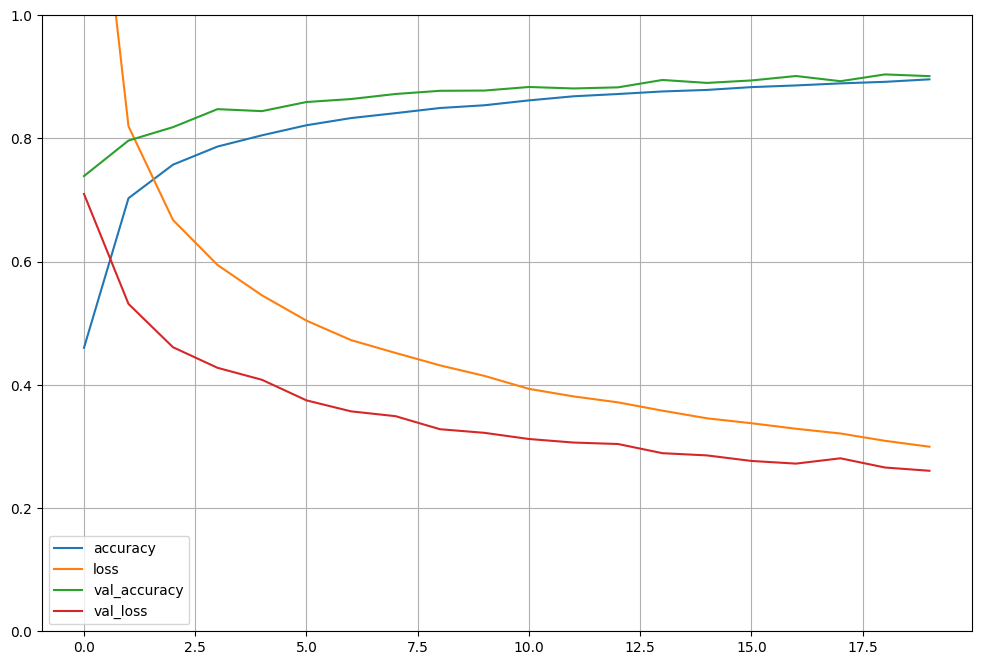

In [24]:
# Cria um DataFrame com o histórico de treinamento da CNN (history_cnn) e plota o gráfico
# Isso permite visualizar as curvas de aprendizado (perda e acurácia) ao longo das 20 épocas
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
# Adiciona a grade para facilitar a leitura
plt.grid(True)
# Define o limite vertical do gráfico entre 0 e 1 (pois a acurácia é percentual e a perda normalizada tende a ser baixa)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
# Exibe o gráfico
plt.show()

**Avaliação descritiva dos resultados:**
A CNN foi configurada com uma arquitetura profunda, utilizando blocos de Convolução seguidos de Pooling para extração de características (feature extraction), e finalizando com camadas Densas para a classificação (classification). O modelo processa a imagem em 3 etapas de redução de dimensão (3 MaxPoolings), o que permite que a rede aprenda desde bordas simples até formas complexas das roupas.
1. Explicação das Camadas e Operações
   * Camadas de Convolução (Conv2D): O código utiliza 5 camadas de convolução. A primeira usa um filtro (kernel) maior de $5 \times 5$ para capturar características gerais, enquanto as subsequentes usam filtros $3 \times 3$ para detalhes. O número de filtros aumenta progressivamente (64 -> 128 -> 258), permitindo que a rede reconheça uma maior variedade de padrões conforme a imagem fica menor.
    * Camadas de Pooling (MaxPool2D): Foram usadas 3 camadas de Max Pooling com janela 2x2. Isso reduz a altura e largura da imagem pela metade a cada vez, descartando informações menos relevantes e mantendo apenas os valores máximos (características mais fortes).
    * Flatten: Converte a matriz tridimensional resultante das convoluções em um vetor único para ser lido pelas camadas densas.
    * Camadas Densas (Dense): A rede possui duas camadas ocultas densas (128 e 64 neurônios) com ativação ReLU, que processam as características extraídas para tomar a decisão final.
2. Técnicas de Regularização e Otimização
    * Regularização (Dropout): O código utiliza duas camadas de Dropout(rate=0.5) nas camadas densas. Isso significa que, a cada passo do treinamento, 50% dos neurônios são desligados aleatoriamente.
    * Otimização (SGD): Foi utilizado o otimizador SGD (Stochastic Gradient Descent). Ele ajusta os pesos da rede baseando-se no gradiente da função de perda.
3. Função de Ativação na Saída
A camada de saída utiliza a função Softmax (activation="softmax"), ela é essencial pois transforma os valores numéricos brutos (logits) em uma distribuição de probabilidade. A soma das saídas dos 10 neurônios será igual a 1 (100%), e a classe escolhida será a de maior probabilidade.
4. Hiperparâmetros e Ajustes
    * Taxa de Aprendizado (Learning Rate): O código usa o padrão do SGD do Keras (geralmente 0.01), pois não foi especificado manualmente.
    * Épocas: O modelo CNN treinou por 20 épocas, muito mais que a RNA simples (5 épocas). Isso é necessário pois CNNs são mais complexas e demoram mais para convergir.
    * Pré-processamento de Dados: A RNA simples aceita vetores achatados, mas a CNN exige que os dados tenham 3 dimensões: (Altura, Largura, Canais de Cor). Por isso, foi feito o reshape para incluir o canal 1 (escala de cinza).

Comparações:

RNA Simples: Acurácia no teste de aprox. 80% (Loss: 77.04). Treinamento muito rápido.

CNN: Acurácia no teste de aprox. 86.2% (Loss: 30.13). Treinamento muito mais lento.

Conclusão: A CNN superou a RNA simples significativamente em acurácia. No entanto, observando o histórico da CNN, a acurácia de treino chegou a ~89.6% enquanto a validação ficou em ~90%, indicando que o Dropout funcionou bem para controlar o overfitting.
Além disso, o modelo CNN obteve uma acurácia no teste de 86.21% (comparado aos ~80% da RNA). Isso confirma a teoria de que Redes Convolucionais são superiores para tarefas de imagem, pois seus filtros conseguem capturar hierarquias de características espaciais (bordas, texturas, formas) que uma rede densa comum (RNA) perde ao "achatar" a imagem logo no início.

Potencial de Melhoria:

Normalização do Teste: Aplicar X_test = X_test / 255.0 antes da avaliação.

Otimizador: Substituir o SGD pelo Adam, que possui taxa de aprendizado adaptativa e tende a convergir mais rápido.

Batch Normalization: Inserir camadas de normalização após as convoluções para estabilizar o treinamento e permitir taxas de aprendizado maiores.